In [1]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pprint import pprint
from util.load import DataLoader
from util.backtest import Backtest
from util.plot import (
    create_pairwise_scatter_plot,
    create_correlation_matrix,
    plot_backtest_results,
)

In [2]:
dataloader = DataLoader(data_dir="../data")
ticker = "kxhighny"
max_days = 100
df = dataloader.load_consolidated_daily_data(
    ticker, max_days=max_days, type_="polysignal"
)
df.drop(columns=["time", "ticker", "trade_id"]).head()

Loading kxhighny for 2025-03-25: 100%|██████████| 34/34 [00:00<00:00, 163.91it/s]


time_to_strike  day_forecast_strike_dev  current_forecast_strike_dev  \
0       86378.686                      1.3                        -12.1   
1       86378.686                      1.3                        -12.1   
2       86378.686                      1.3                        -12.1   
3       86378.686                      1.3                        -12.1   
4       86378.686                      1.3                        -12.1   

   day_current_forecast_dev  day_wind_gusts_max  day_wind_speed_max  \
0                      13.4                51.8                27.5   
1                      13.4                51.8                27.5   
2                      13.4                51.8                27.5   
3                      13.4                51.8                27.5   
4                      13.4                51.8                27.5   

   day_cloud_cover_max  day_cloud_cover_min  day_sunshine_duration  \
0                   99                    0               41428.27   
1                   99                    0               41428.27   
2                   99                    0               41428.27   
3                   99                    0               41428.27   
4                   99                    0               41428.27   

   hour_wind_gusts  ...  yes_price_sentiment_60  count_sentiment_60  \
0             18.4  ...                  43.333             100.733   
1             18.4  ...                  43.333             100.733   
2             18.4  ...                  43.333             100.733   
3             18.4  ...                  43.333             100.733   
4             18.4  ...                  43.333             100.733   

   yes_price_trend_60  count_agg_120  yes_price_vol_120  count_vol_120  \
0                  -4           1511              2.637         99.877   
1                  -4           1511              2.637         99.877   
2                  -4           1511              2.637         99.877   
3                  -4           1511              2.637         99.877   
4                  -4           1511              2.637         99.877   

   taker_side_sentiment_120  yes_price_sentiment_120  count_sentiment_120  \
0                       1.0                   43.333              100.733   
1                       1.0                   43.333              100.733   
2                       1.0                   43.333              100.733   
3                       1.0                   43.333              100.733   
4                       1.0                   43.333              100.733   

   yes_price_trend_120  
0                   -4  
1                   -4  
2                   -4  
3                   -4  
4                   -4  

[5 rows x 64 columns]

In [4]:
df.describe()

time  time_to_strike  day_forecast_strike_dev  \
count                          38246    38246.000000             38246.000000   
mean   2025-04-11 17:33:47.314008832    47926.198515                -0.104231   
min       2025-03-24 23:59:21.313972        7.319000               -13.100000   
25%    2025-03-31 14:43:51.272712704    36351.607750                -1.500000   
50%    2025-04-12 22:28:56.664762880    45004.776500                 0.000000   
75%    2025-04-19 16:41:39.678531072    54987.492750                 1.600000   
max       2025-04-29 16:37:37.683221    86399.922000                 9.000000   
std                              NaN    17423.570467                 2.527874   

       current_forecast_strike_dev  day_current_forecast_dev  \
count                 38246.000000              38246.000000   
mean                     -8.078508                  7.974277   
min                     -34.400000                 -0.900000   
25%                     -12.800000                  1.800000   
50%                      -6.200000                  5.700000   
75%                      -2.300000                 12.800000   
max                       6.400000                 32.200000   
std                       7.302725                  7.408113   

       day_wind_gusts_max  day_wind_speed_max  day_cloud_cover_max  \
count        38246.000000        38246.000000         38246.000000   
mean            44.483739           23.316096            90.529859   
min             22.300000           15.900000             0.000000   
25%             38.500000           18.700000           100.000000   
50%             44.600000           21.700000           100.000000   
75%             50.400000           25.800000           100.000000   
max             62.600000           36.000000           100.000000   
std             10.160396            5.461857            27.142861   

       day_cloud_cover_min  day_sunshine_duration  ...  \
count         38246.000000           38246.000000  ...   
mean             10.877791           28472.039953  ...   
min               0.000000               0.000000  ...   
25%               0.000000           20525.750000  ...   
50%               0.000000           32278.740000  ...   
75%               5.000000           41749.210000  ...   
max             100.000000           45756.000000  ...   
std              24.693260           14602.920595  ...   

       yes_price_sentiment_60  count_sentiment_60  yes_price_trend_60  \
count            38246.000000        38246.000000        38246.000000   
mean                35.804485           33.253332           -1.849736   
min                  3.000000            1.000000          -93.000000   
25%                 18.391000           15.024500           -8.000000   
50%                 32.740000           25.304000           -1.000000   
75%                 50.329250           42.983000            4.000000   
max                 97.000000          786.500000           85.000000   
std                 21.789814           30.485600           16.509765   

       count_agg_120  yes_price_vol_120  count_vol_120  \
count   38246.000000       38246.000000   38246.000000   
mean     7109.931862           6.654367      55.598155   
min         1.000000           0.000000       0.000000   
25%      3134.000000           2.445000      24.610000   
50%      5355.500000           4.950000      43.630500   
75%      9166.000000           8.918750      69.850000   
max     37019.000000          30.263000     716.283000   
std      6143.911294           5.745906      48.211798   

       taker_side_sentiment_120  yes_price_sentiment_120  count_sentiment_120  \
count              38246.000000             38246.000000         38246.000000   
mean                   0.562942                35.381432            32.008674   
min                    0.000000                 3.000000             1.000000   
25%                    0.438000                19.255250          

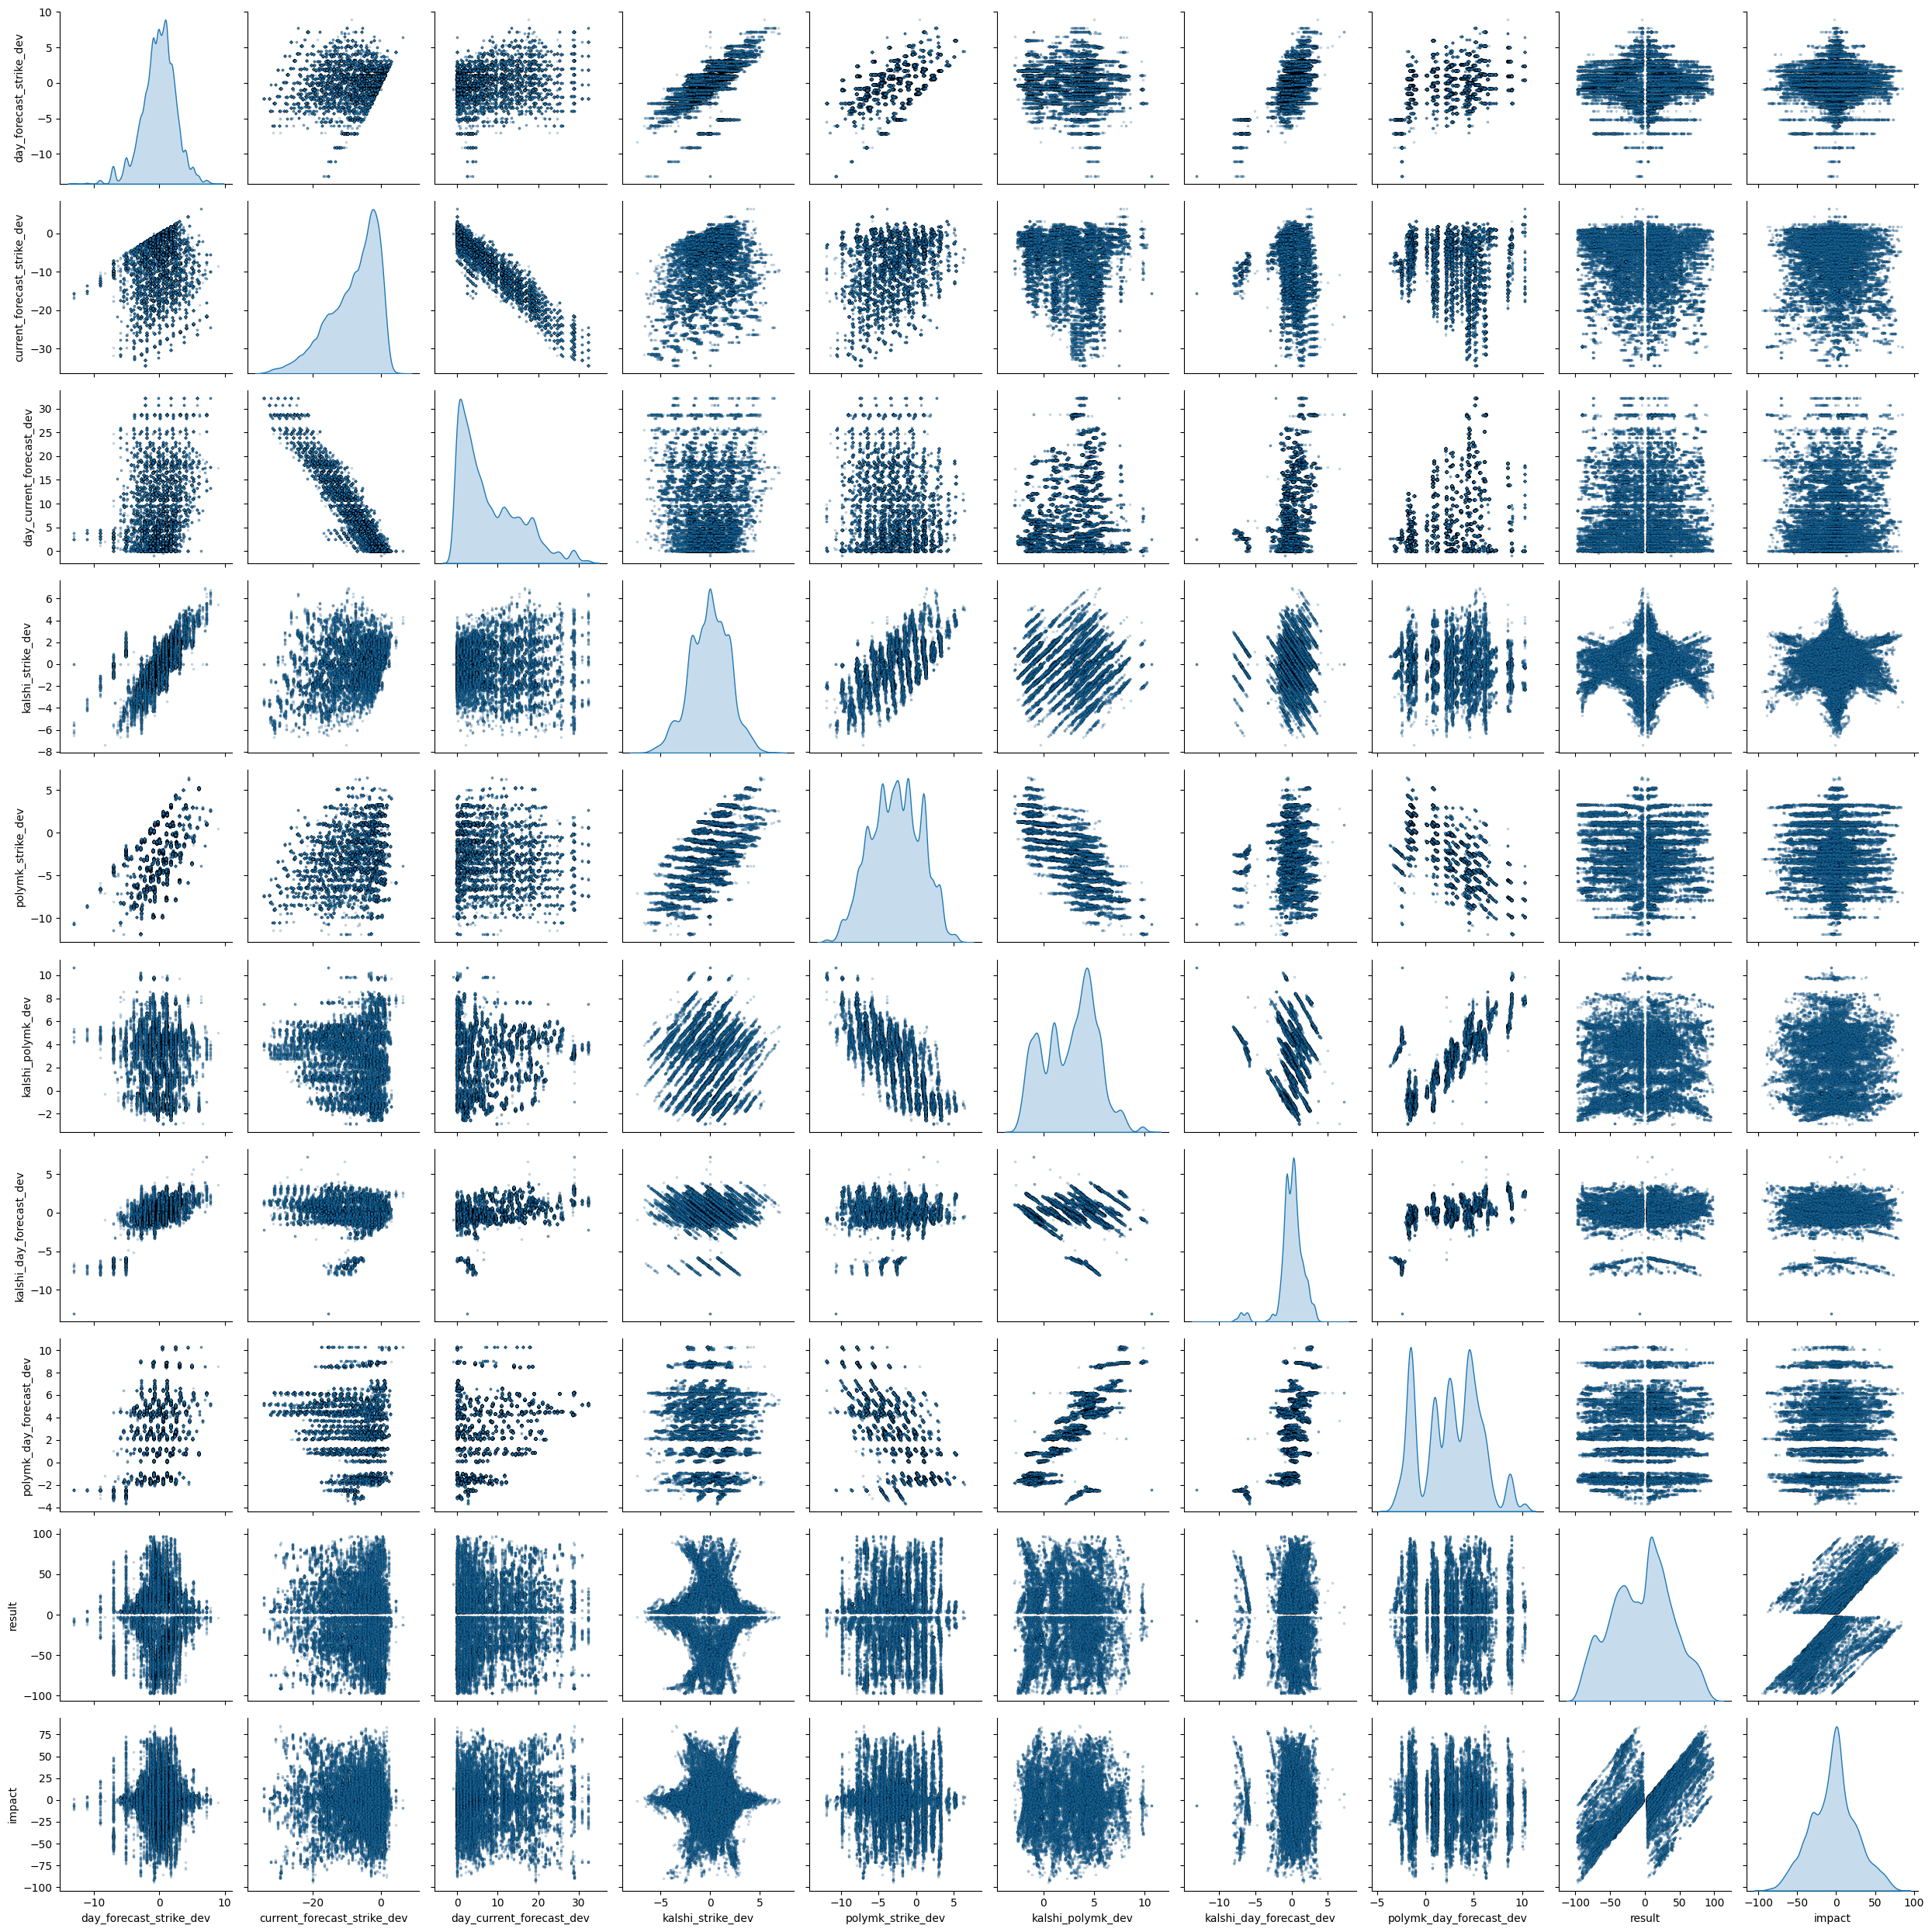

In [5]:
dev_features = [f for f in df.columns if f.endswith("dev")]
create_pairwise_scatter_plot(df, dev_features + ["result", "impact"])

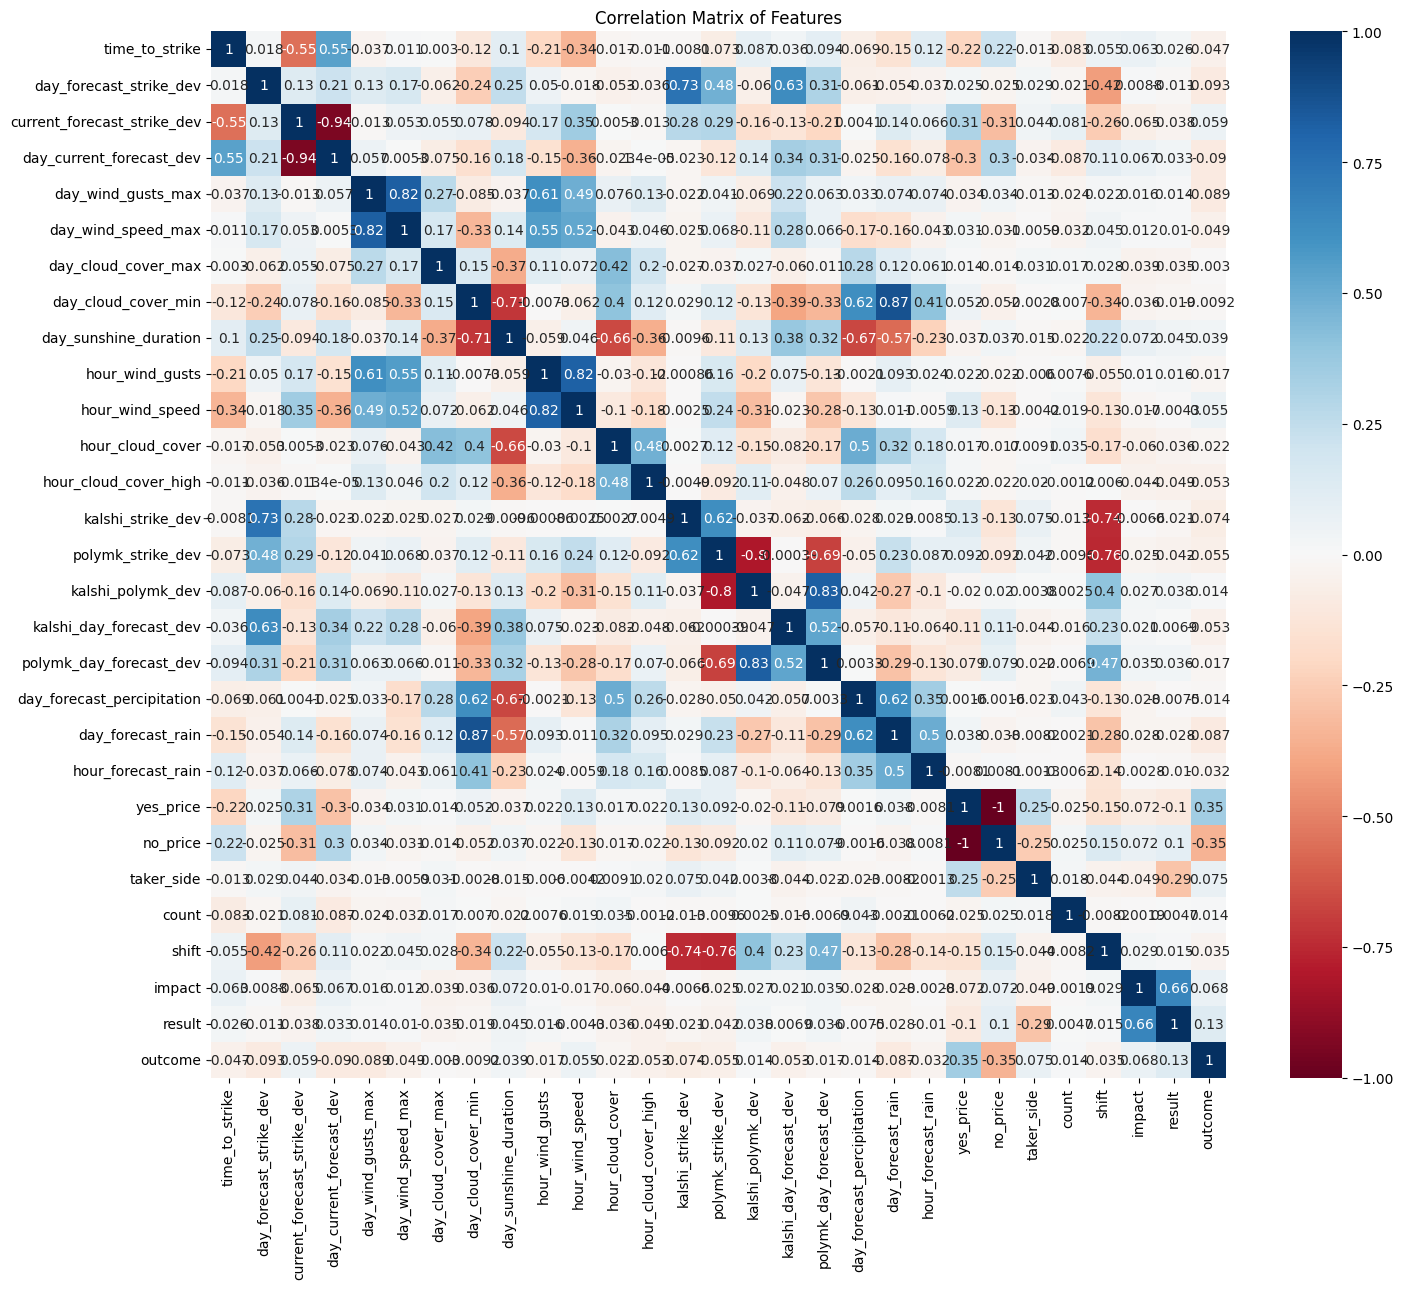

In [6]:
market_features = [
    f
    for f in df.columns.tolist()
    if not f.split("_")[-1].isdigit() and f not in ["time", "ticker", "trade_id"]
]
create_correlation_matrix(df, market_features)

2025-04-19 | R2 train: 0.048608127293984116, R2 test: -0.047266601431642075
2025-04-20 | R2 train: 0.04440669593874069, R2 test: -0.18095075110223813
2025-04-21 | R2 train: 0.0438206633555106, R2 test: -0.029840905053744482
2025-04-23 | R2 train: 0.0405566244876131, R2 test: 0.039023741242630194
2025-04-24 | R2 train: 0.04412744841619076, R2 test: 0.17622163594788498
2025-04-25 | R2 train: 0.05518467918338432, R2 test: 0.30862406325517977
2025-04-26 | R2 train: 0.0619494348506916, R2 test: 0.21383006018609285
2025-04-27 | R2 train: 0.07367618202592963, R2 test: 0.2967487771898807
2025-04-28 | R2 train: 0.08157610425542561, R2 test: 0.36535960781040566
2025-04-29 | R2 train: 0.09092077023062572, R2 test: 0.3158817567679424


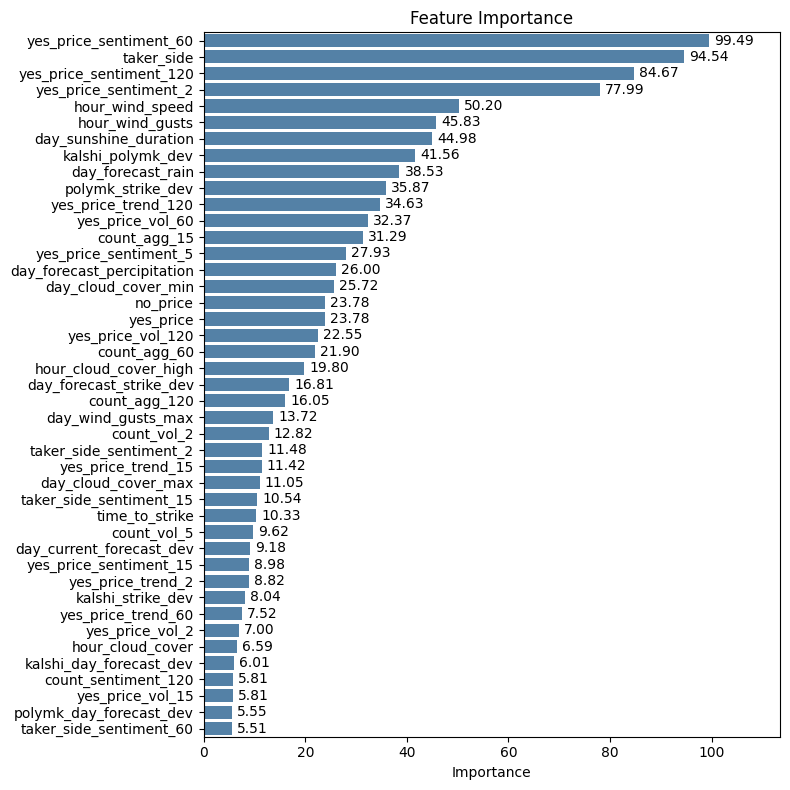

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import RobustScaler, QuantileTransformer, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import (
    LinearRegression,
    Lasso,
    QuantileRegressor,
    BayesianRidge,
    Ridge
)
from sklearn.model_selection import TimeSeriesSplit

# turn time into datetime object

def plot_feature_importances(df, threshold=1):
    df['time'] = pd.to_datetime(df['time'])
    df['date'] = df['time'].dt.date
    exclude = np.array(["time", "result", "impact", "ticker", "trade_id", "outcome", "date"])
    features = np.array([f for f in df.columns.tolist() if f not in exclude])
    tscv = TimeSeriesSplit(n_splits=10, test_size=1)
    feature_importances = np.zeros(len(features))

    for train_index, test_index in tscv.split(df['date'].unique()):
        train_dates, test_dates = (
            df['date'].unique()[train_index], 
            df['date'].unique()[test_index]
        )
        train_data, test_data = (
            df[df['date'].isin(train_dates)], 
            df[df['date'].isin(test_dates)]
        )
        
        # scaler = RobustScaler(unit_variance=True)
        scaler = StandardScaler()
        train_data[features] = scaler.fit_transform(train_data[features])
        test_data[features] = scaler.transform(test_data[features])
        lasso = Ridge(alpha=.1)
        lasso.fit(train_data[features], train_data["result"])
        # rf = RandomForestRegressor(n_estimators=100, random_state=42)
        # rf.fit(train_data[features], train_data["result"])
        r2_train = lasso.score(train_data[features], train_data["result"])
        r2_test = lasso.score(test_data[features], test_data["result"])
        print(f"{test_dates[0]} | R2 train: {r2_train}, R2 test: {r2_test}")
        feature_importances += lasso.coef_

    feature_importances = abs(feature_importances)
    sorted_idx = np.argsort(feature_importances)[::-1]
    features, feature_importances = features[sorted_idx], feature_importances[sorted_idx]
    features = features[feature_importances > threshold]
    feature_importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances[feature_importances > threshold]})
    

    plt.figure(figsize=(8, 8))
    ax = sns.barplot(y='Feature', x='Importance', data=feature_importances_df, color='steelblue')
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('')
    for i, bar in enumerate(ax.patches):
        width = bar.get_width()
        ax.text(width + 1, 
                bar.get_y() + bar.get_height()/2,
                f'{width:.2f}', 
                ha='left', 
                va='center',)
    current_xlim = plt.xlim()
    plt.xlim(current_xlim[0], current_xlim[1] + 9)
    plt.tight_layout()
    plt.show()

plot_feature_importances(df, threshold=5)

In [46]:
r2_train = lasso.score(train_data[features], train_data["result"])
r2_test = lasso.score(test_data[features], test_data["result"])
print(f"R2 train: {r2_train}, R2 test: {r2_test}")

print(features[lasso.coef_ != 0])
print(len(features[lasso.coef_ != 0]) / len(features))

R2 train: 0.030672421275434902, R2 test: 0.12766449640862376
['day_sunshine_duration' 'hour_wind_gusts' 'hour_cloud_cover_high'
 'kalshi_polymk_dev' 'taker_side' 'yes_price_vol_60' 'yes_price_trend_120']
0.11475409836065574


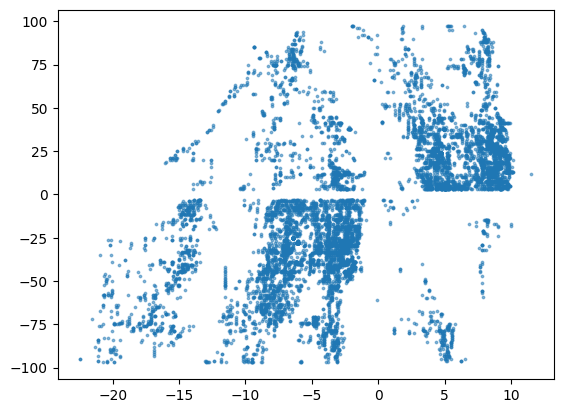

In [42]:
plt.scatter(lasso.predict(test_data[features]), test_data["result"], alpha=0.5, s=3)
plt.show()


In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, QuantileTransformer
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import (
    LinearRegression,
    Lasso,
    QuantileRegressor,
    BayesianRidge,
)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import VotingRegressor, StackingRegressor
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF


class Model(object):
    def __init__(
        self,
        output_metric: str = "result",
        features: list[str] = None,
        outlier_threshold: float = 0.00,
    ):
        self.output_metric = output_metric
        self.features = features
        self.outlier_threshold = outlier_threshold
        self.pipeline = Pipeline(
            [
                ("robust_scaler", RobustScaler(unit_variance=True)),
                (
                    "quantile_transformer",
                    QuantileTransformer(n_quantiles=100, output_distribution="normal"),
                ),
                (
                    "voting",
                    VotingRegressor(
                        estimators=[
                            (
                                "gb",
                                GradientBoostingRegressor(
                                    n_estimators=50,
                                    learning_rate=0.01,
                                    max_depth=3,
                                    subsample=0.5,
                                    min_samples_split=50,
                                    random_state=42,
                                ),
                            ),
                            # (
                            #     "rf",
                            #     RandomForestRegressor(
                            #         n_estimators=50, max_depth=3, random_state=42
                            #     ),
                            # ),
                            # ("lasso", LinearRegression()),
                            # ("knn_10", KNeighborsRegressor(n_neighbors=20)),
                        ],
                        n_jobs=-1,
                    ),
                ),
            ]
        )

    def __call__(
        self, train_data: pd.DataFrame, input_data: pd.DataFrame
    ) -> pd.DataFrame:
        if self.features is None:
            self.features = [
                f
                for f in train_data.columns.tolist()
                if (
                    f
                    not in ["time", "result", "impact", "ticker", "trade_id", "outcome"]
                )
                and (not f[-1].isdigit())
            ]
            # print(self.features)
        self.pipeline.fit(train_data[self.features], train_data[self.output_metric])
        input_predictions = self.pipeline.predict(input_data[self.features])
        train_predictions = self.pipeline.predict(train_data[self.features])
        return train_predictions, input_predictions

100%|██████████| 33/33 [00:29<00:00,  1.11it/s]


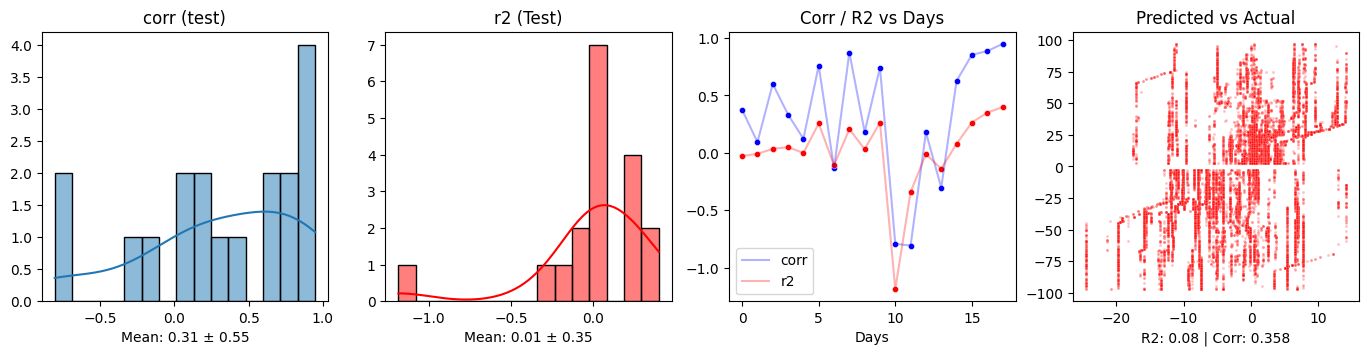

In [14]:
min_window_size, max_window_size, backtest_window = 15, 30, 50

output_metric = "result"
backtest = Backtest("kxhighny", data_dir="../data", backtest_window=backtest_window)
model = Model(features=None, output_metric=output_metric)

results, predictions, day_predictions, predictions_df = backtest.get_backtest_stats(
    model,
    min_window_size,
    max_window_size,
    output_metric=output_metric,
    # scaler=QuantileTransformer(n_quantiles=100, output_distribution="uniform")
    # scaler=QuantileTransformer(n_quantiles=100, output_distribution="normal")
)
plot_backtest_results(results, predictions)

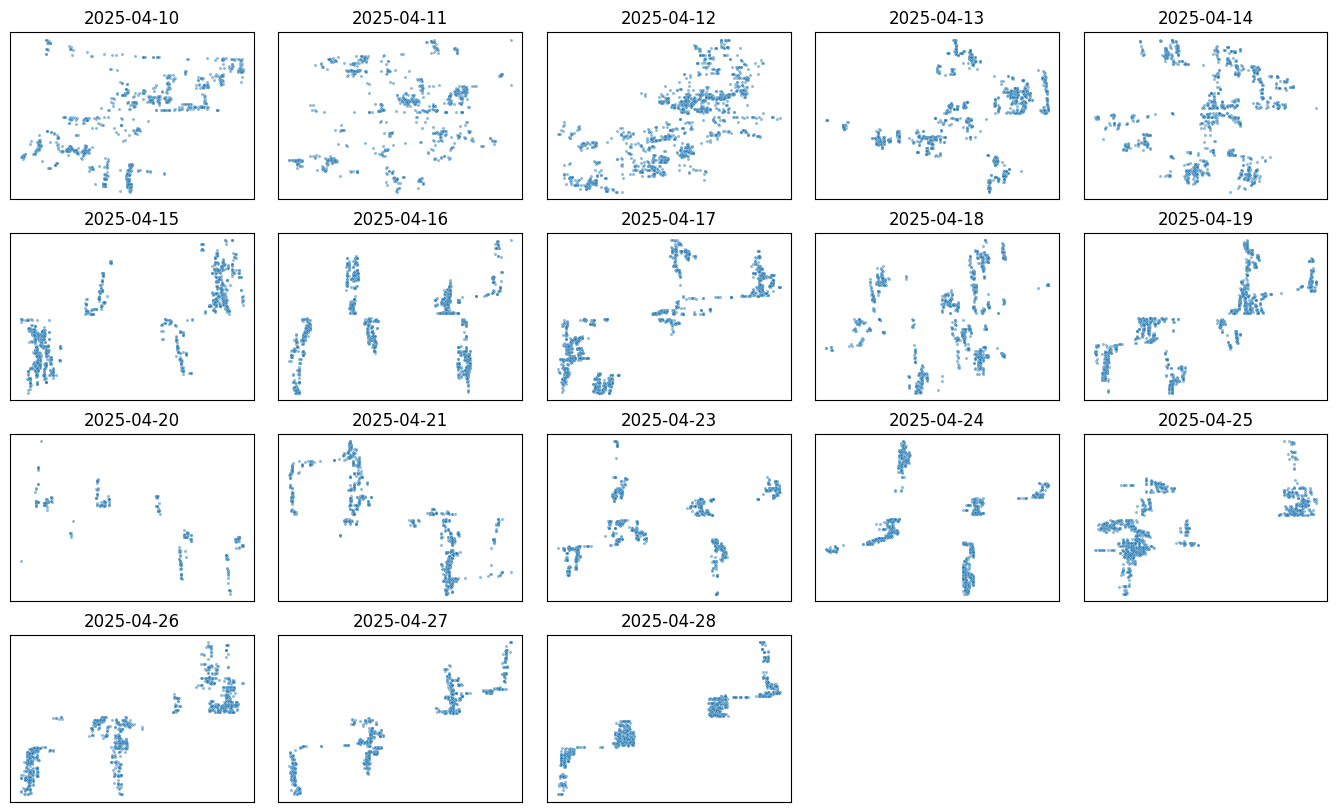

In [10]:
dates = sorted(list(day_predictions.keys()))
fig, axs = plt.subplots(len(dates) // 5 + 1, 5, figsize=(17, 10))

# Add padding between subplots
plt.subplots_adjust(hspace=0.2, wspace=0.1)

for i in range(0, len(dates), 5):
    for idx, date in enumerate(dates[i : i + 5]):
        if i // 5 < axs.shape[0] and idx < axs.shape[1]:  # Check if the subplot exists
            # axs[i//5, idx].scatter(day_predictions[date]["y_pred"], day_predictions[date]["y_real"], alpha=0.5, s=2)
            sns.scatterplot(
                x="y_pred",
                y="y_real",
                data=day_predictions[date],
                ax=axs[i // 5, idx],
                alpha=0.5,
                s=5,
            )
            axs[i // 5, idx].set_title(date)
            axs[i // 5, idx].xaxis.set_visible(False)
            axs[i // 5, idx].yaxis.set_visible(False)

# Hide empty subplots in the last row
for i in range(len(dates), (len(dates) // 5 + 1) * 5):
    row = i // 5
    col = i % 5
    if row < axs.shape[0] and col < axs.shape[1]:
        axs[row, col].set_visible(False)
plt.show()

In [9]:
np.mean(predictions_df[predictions_df["taker_side"] == 1]["result"])
np.mean(predictions_df[predictions_df["taker_side"] == 0]["result"])

np.float64(13.619694006672034)

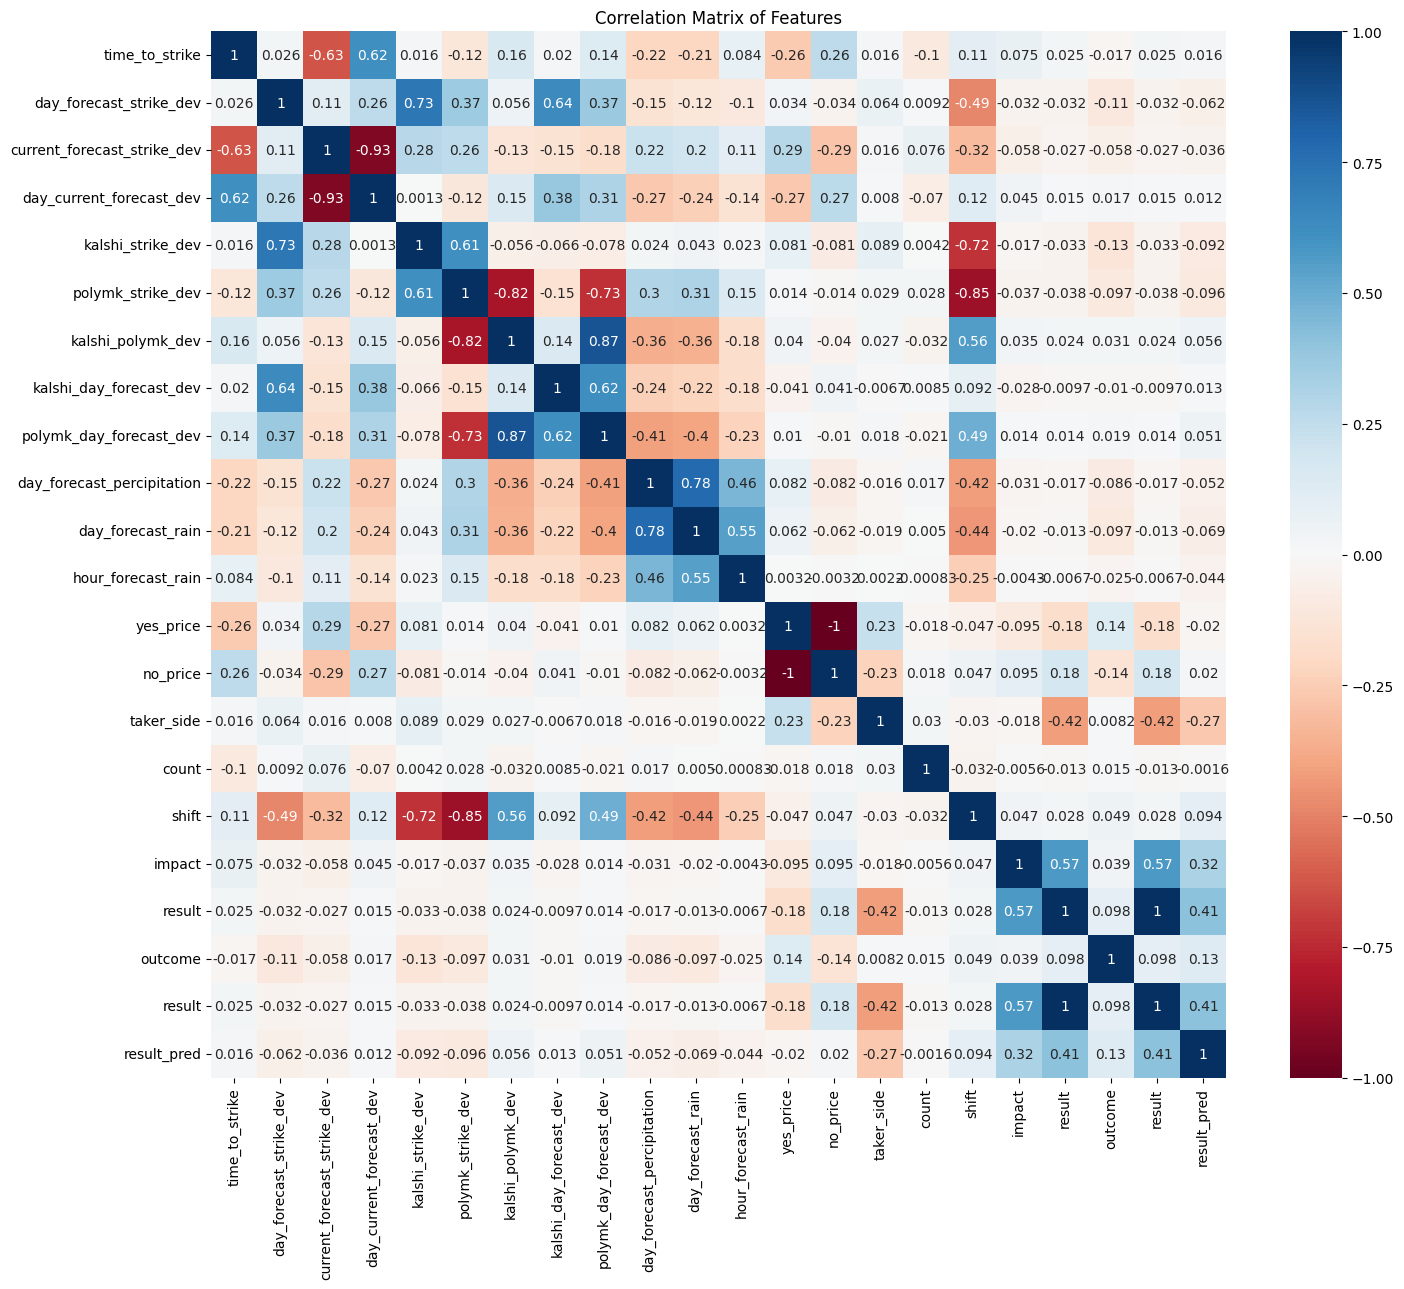

In [10]:
create_correlation_matrix(predictions_df, market_features + ["result", "result_pred"])